Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech </a>.

<div class="jumbotron">
  <h1 class="display-4">Iterators</h1>
    <p class="lead">An Iterator is an object that can iterate over an iterable object.</p>
  <hr>
  <h3 class="display-6"> Contents </h3>

  <ul style="list-style-type:none">
    <li> <a href="#What-is-an-Iterator"> &#10070; What is an Iterator </a> </li>
     <li> <a href="#Build-your-own-Iterator"> &#10070; Build your own Iterator </a> </li>
      <li> <a href="#Loop-over-an-Iterable"> &#10070; Loop over an Iterable </a> </li>          
  </ul>
</div>



<hr>

<div class="alert alert-secondary" id="What-is-an-Iterator">    
    <span class="topic"> &#10070; What is an Iterator</span>   
</div>

An **Iterator** is an object that can iterate over an iterable object. 

<div class="text-center">
    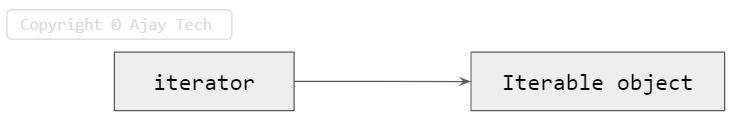
</div>    

Let's look at a couple of examples. 

In [15]:
age = 21
iterable = iter(age)

TypeError: 'int' object is not iterable

What does the error say ? **int** object is **not** iterable. Let's try the same with a list.

<div class="text-center">
    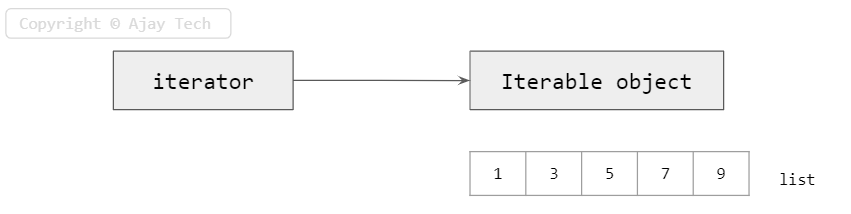
</div>    

In [16]:
odd_numbers = [1,3,5,7,9]

i = iter(odd_numbers)

This time there is no error. What is the difference ? Earlier we were trying to iterate over an integer ( which is **not** iterable ), while this time we are iterating over a list ( which is **iterable**). 

Essentially, think of an **iterable** object like a list - something with multiple elements (unlike simple objects like integers or floats). Even simple strings are iterable ( it has multiple characters strung together, isn't it ). We will see all of these examples in a bit. But the question you might have now is, what to do with this iterator ? What is the purpose of an iterator ? 

<div class="text-center">
    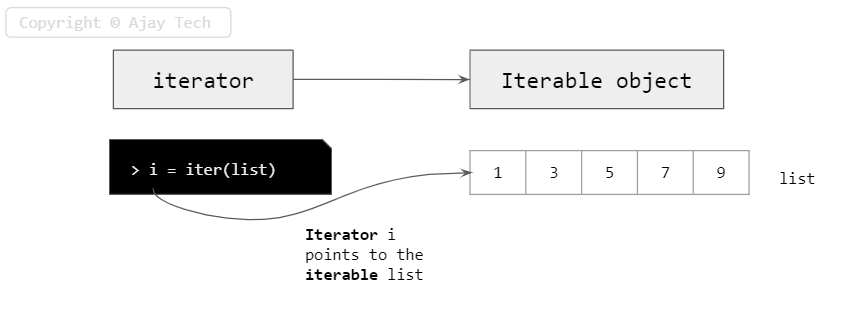
</div>   

The primary purpose of an **iterator** is to iterate over the elements in the object it is pointing to. And how exactly do we do it ? Using the Python's built-in **next ( )** function. Each call to the **next ( )** function returns the subsequent element in the **iterable** object. For example, each subsequent **next ( )** call returns the next element in the list. See example below. 

<div class="text-center">
    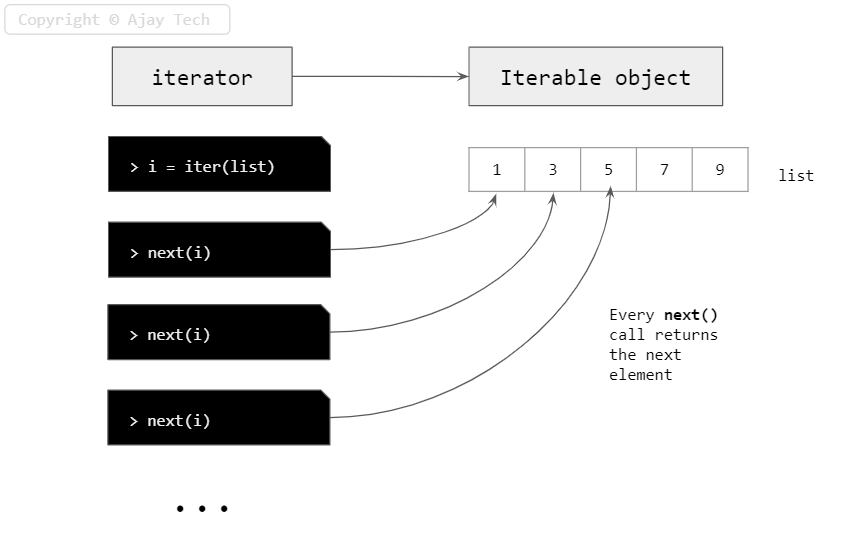
</div>    

In [11]:
print ( next(i) ) # first
print ( next(i) ) # second
print ( next(i) ) # third
print ( next(i) ) # fourth
print ( next(i) ) # fifth

1
3
5
7
9


What happens when you reach the end ? Python throws a **StopIteration** exception. 

<div class="text-center">
    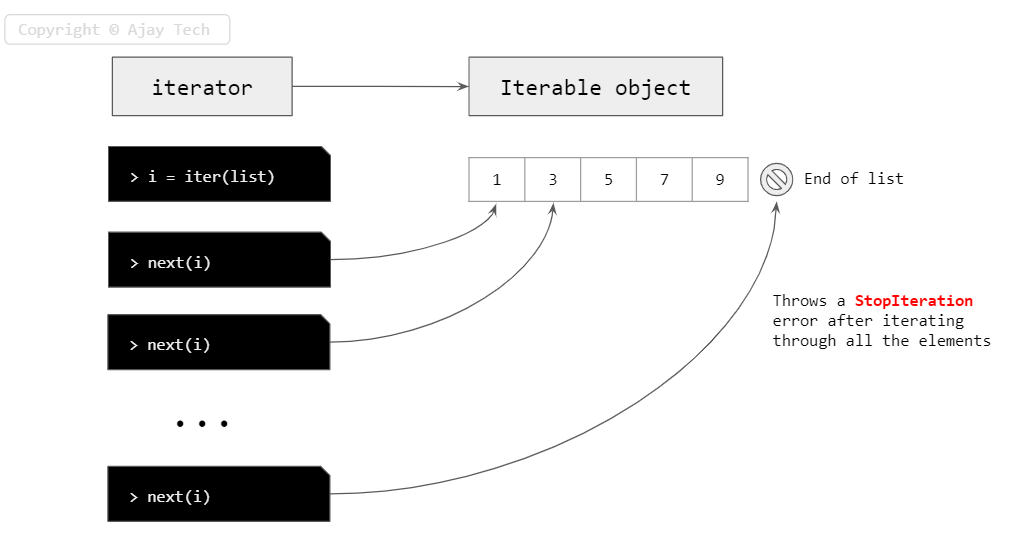
</div>    

In [12]:
next(i)

StopIteration: 

Of course, lists are not the only **iterable** objects. Even simple strings are iterable - each time returning the next element when the **next ( )** function is called. 

In [18]:
name = "Ajay Tech"

iterable = iter(name)

print ( next(iterable) ) # first
print ( next(iterable) ) # second
print ( next(iterable) ) # third
print ( next(iterable) ) # fourth
print ( next(iterable) ) # fifth .. and so on


A
j
a
y
 


What about dictionaries ? 

In [20]:
names = { "Ajay" : 21,
          "Stacy": 22}

iterable = iter(names)

print ( next(iterable) ) # first
print ( next(iterable) ) # second

Ajay
Stacy


Why does a dictionary iterable just return the keys ? Well, that's how the Python dictionary class is defined. We will see in a bit how to define our own iterable classes. 

The same logic applies for tuples & sets as well. 

In [21]:
names = ("Ajay","Stacy") # tuple

iterable = iter(names)

print ( next(iterable) ) # first
print ( next(iterable) ) # second

Ajay
Stacy


In [22]:
names = {"Ajay","Stacy"} # set

iterable = iter(names)

print ( next(iterable) ) # first
print ( next(iterable) ) # second

Ajay
Stacy


<hr>

<div class="alert alert-secondary" id="Build-your-own-Iterator">    
    <span class="topic"> &#10070; Build your own Iterator</span>   
</div>

An **iterator** is an object that implements the __next__ method. An **iterable** is an object that implements the __iter__and __next__ methods. That was geeky enough - let's try to create a simple iterable class. We know what a Fibonacci series is already. Let's create a Fibonacci iterable class that outputs the next Fibonacci number. 

<div class="text-center">
    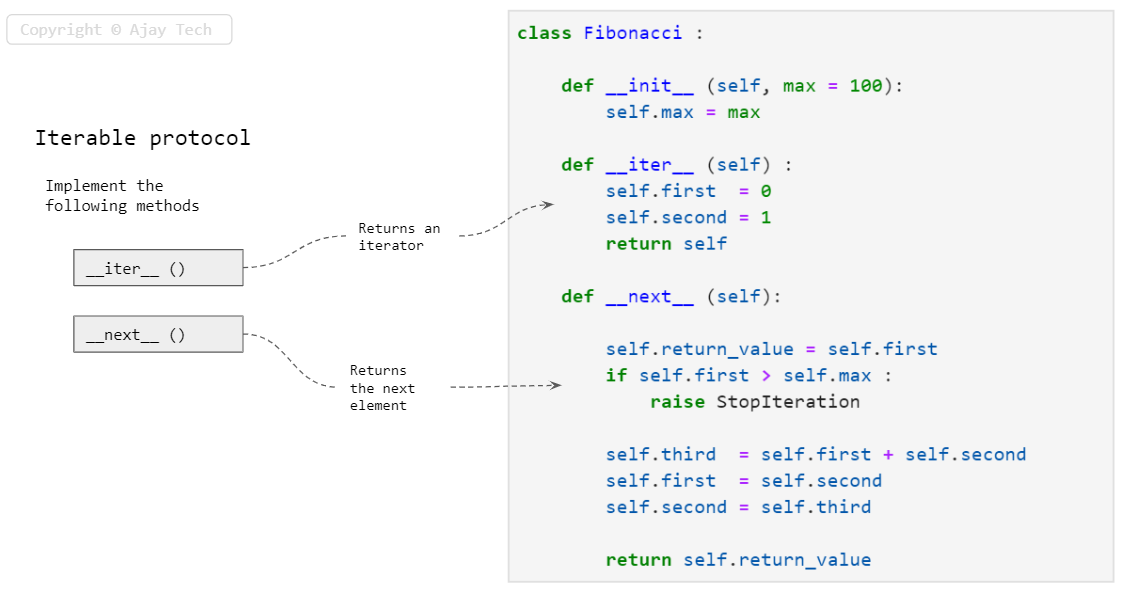
</div>    

In [54]:
class Fibonacci :
    
    def __init__ (self, max = 100):
        self.max = max
        
    def __iter__ (self) :
        self.first  = 0
        self.second = 1
        return self
        
    def __next__ (self):
        
        self.return_value = self.first
        if self.first > self.max :
            raise StopIteration

        self.third  = self.first + self.second
        self.first  = self.second        
        self.second = self.third 

        return self.return_value

In [55]:
f = iter(Fibonacci())

In [56]:
print ( next(f) ) # first
print ( next(f) ) # second
print ( next(f) ) # third
print ( next(f) ) # fourth
print ( next(f) ) # fifth
print ( next(f) ) # sixth and so on..

0
1
1
2
3
5


What you have here is an enhanced version of a Fibonacci class that can act as an iterable. Of course you can define a function in it that returns all the fibonacci numbers, but if you want them in a sequence this is how you do it.

<hr>

<div class="alert alert-secondary" id="Loop over an Iterable">    
    <span class="topic"> &#10070; Loop over an Iterable</span>   
</div>

Of course, you can't be issuing print statements every time. The primary purpose of an iterable is to get the next element. So, obviously it makes sense that it would be very suitable with a for loop. In fact for loop internall works by calling the iterable methods. 

<div class="text-center">
    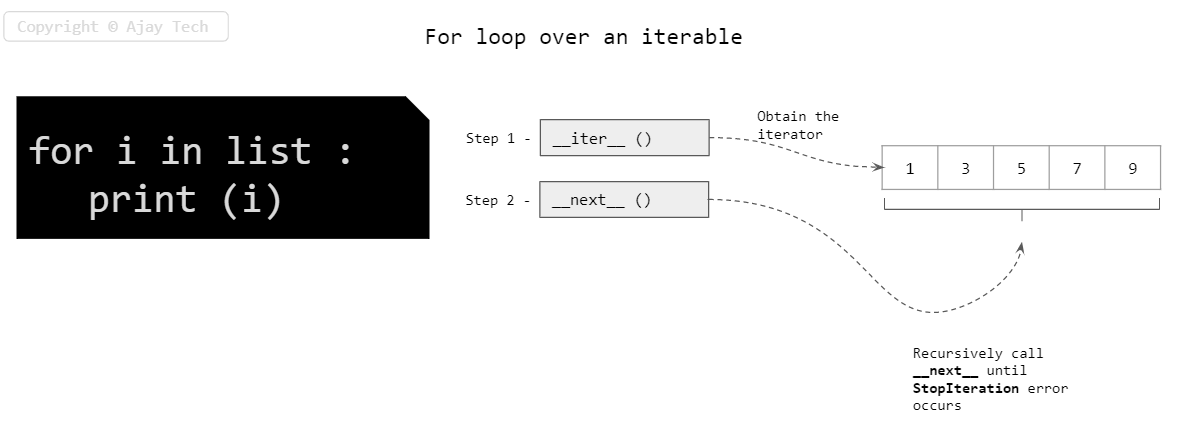
</div>    

Let's see if our Fibonacci class works with a for loop.

In [57]:
fib = Fibonacci()

for f in fib :
    print ( f )

0
1
1
2
3
5
8
13
21
34
55
89


Yay!! it worked. 

In [1]:
# import bootstrap
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen("https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta3/dist/css/bootstrap.min.css")
HTML('<style>' + html.read().decode('utf-8') + '</style>')
# bootstrap_icons = urlopen("https://cdn.jsdelivr.net/npm/bootstrap-icons@1.4.0/font/bootstrap-icons.css")
# HTML('<style>' + bootstrap_icons.read().decode('utf-8') + '</style>')

In [2]:
# Custom css classes for text highlighting (based on bootstrap.css)

from IPython.core.display import HTML
HTML("""
<style>

kbd { 
    background-color : black !important; 
    font-size : unset !important
}

.yellow { 
    background-color : #fff3cd !important; 
    color : black !important 
}

code { 
    border-radius : .2rem;
    background-color : white !important;
    border : solid 1px black !important
}

.jumbotron {
    background-color : #e9ecef;
    padding : 2rem 1rem;
    border-radius :.3rem
}

.list-group-flush {
    background-color : #e2e3e5 !important;
    padding-left : 0em !important;
}

.list-group-item {
    background-color : #e2e3e5; !important;
}

img {
    box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19) !important;
}

.bookmark {
    box-shadow : none !important;
    padding-bottom : .5rem !important;
}

.topic {
    font-size : 1.25rem !important;
}

.alert-info {
    background-color : #d1ecf1 !important;
    border-color : #bee5eb !important;
}

</style>
""")

In [3]:
# Make the notebook printer friendly by removing the prompts at the left of the code sections.
from IPython.core.display import HTML
HTML("""
<style>

.prompt { display : none;  } 

.jp-InputPrompt {
    color : white !important;
}

.jp-InputArea-prompt {
    color : white !important;
}
.jp-OutputPrompt{
    color : white !important;
}
.jp-OutputArea-prompt{
    color : white !important;
}

</style>
""")